# Implementing the LSTM Layer in Keras

### Notebook Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras import layers

import matplotlib.pyplot as plt 

2024-01-31 12:15:52.392181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 12:15:52.392279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 12:15:52.539672: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Constants

In [2]:
MAX_FEATURES = 10000
MAX_LENGTH = 500

### Loading the Data

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

print('shape of input training data:', X_train.shape)
print('shape of input test data:', X_test.shape)

shape of input training data: (25000, 500)
shape of input test data: (25000, 500)


### Training the Model with Embedding and LSTM layers

In [5]:
network = keras.Sequential([
    layers.Embedding(MAX_FEATURES, 32), 
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
network.compile(optimizer='rmsprop', metrics=['accuracy'], loss='binary_crossentropy')

In [7]:
history = network.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


I0000 00:00:1706703375.140646      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 [==============================] - 22s 120ms/step - loss: 0.5799 - accuracy: 0.6900 - val_loss: 0.4560 - val_accuracy: 0.8216
Epoch 2/10
157/157 [==============================] - 14s 92ms/step - loss: 0.3511 - accuracy: 0.8561 - val_loss: 0.3385 - val_accuracy: 0.8580
Epoch 3/10
157/157 [==============================] - 11s 70ms/step - loss: 0.2676 - accuracy: 0.8950 - val_loss: 0.3659 - val_accuracy: 0.8400
Epoch 4/10
157/157 [==============================] - 8s 52ms/step - loss: 0.2287 - accuracy: 0.9133 - val_loss: 0.2923 - val_accuracy: 0.8796
Epoch 5/10
157/157 [==============================] - 8s 52ms/step - loss: 0.1962 - accuracy: 0.9307 - val_loss: 0.2897 - val_accuracy: 0.8830
Epoch 6/10
157/157 [==============================] - 8s 50ms/step - loss: 0.1822 - accuracy: 0.9348 - val_loss: 0.3458 - val_accuracy: 0.8530
Epoch 7/10
157/157 [==============================] - 6s 41ms/step - loss: 0.1575 - accuracy: 0.9433 - val_loss: 0.4415 - val_accuracy: 0.8536
Epoch 

### Displaying the Results

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

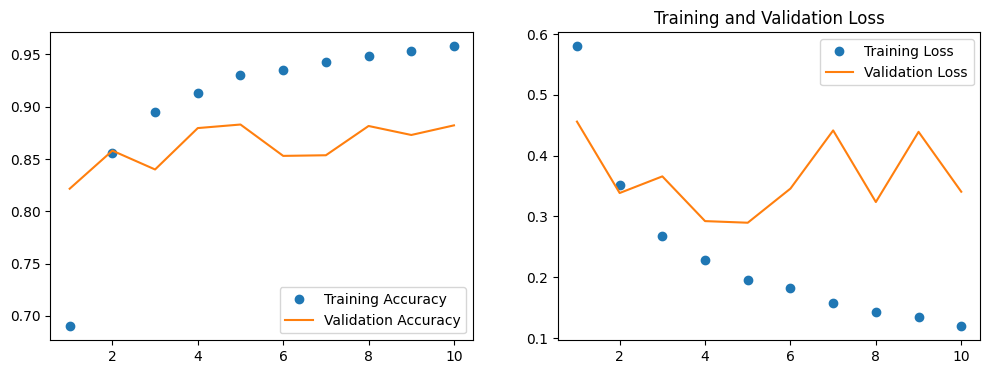

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs = range(1, len(acc) + 1)
ax1.plot(epochs, acc, 'o', label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'o', label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend()